In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import joblib

In [2]:
data = pd.read_csv('./data/amine_treatment-final.csv', on_bad_lines='skip')
data

,"feed_gas temperature, C","feed_gas pressure, kPa","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas actual liquid flow, m3/h","feed_gas actual vapour flow, m3/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,...,degased_amine Propane mol frac,degased_amine i-Butane mol frac,degased_amine n-Butane mol frac,degased_amine i-Pentane mol frac,degased_amine n-Pentane mol frac,degased_amine H2S mol frac,degased_amine H2O mol frac,degased_amine MDEAmine mol frac,degased_amine H2S ppm,degased_amine CO2 ppm
0,52.0,6701.325,259647.0,24.668523,80.705482,0.000000,3217.216383,0.031875,0.633122,0.192729,...,0.000004,1.979803e-06,6.785930e-06,3.039502e-08,1.629357e-07,0.014838,0.910916,0.062270,22521.880092,23245.607009
1,40.0,6701.325,63853.0,23.411939,79.292250,0.000000,805.286774,0.039520,0.681947,0.179992,...,0.000006,1.099164e-07,7.886635e-07,2.425456e-06,2.679624e-08,0.010470,0.896612,0.077190,15891.219056,30468.484150
2,46.0,6701.325,15928.0,27.803853,108.358884,0.000000,146.993024,0.027859,0.577870,0.163095,...,0.000018,5.179434e-05,2.863001e-05,4.721545e-06,1.359401e-06,0.001284,0.860268,0.132676,1949.372531,10648.306282
3,36.0,6701.325,150276.0,22.053344,74.092459,0.000000,2028.222609,0.005420,0.856717,0.000249,...,0.000039,8.734358e-06,3.706189e-05,5.426945e-05,3.949909e-06,0.001233,0.809722,0.184359,1871.528366,8438.736973
4,12.0,6701.325,52691.0,24.334510,114.182302,0.002870,461.460940,0.027297,0.694634,0.091063,...,0.000100,7.719691e-05,2.661312e-05,1.351350e-05,6.619552e-06,0.003300,0.788340,0.200715,5008.207346,14011.150105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512795,18.0,6701.325,278813.0,27.267819,147.437736,0.239690,1890.816202,0.036621,0.666807,0.042159,...,0.000053,1.226987e-04,3.336251e-05,4.145371e-06,8.510407e-06,0.002101,0.796328,0.187149,3188.443718,27411.897443
512796,33.0,6701.325,72612.0,26.629816,112.530303,0.000000,645.266193,0.025383,0.605142,0.150361,...,0.000049,8.271254e-05,1.199104e-05,1.810930e-06,4.749955e-06,0.003784,0.826966,0.162727,5742.847844,11941.343733
512797,17.0,6701.325,272718.0,26.290335,135.390018,0.133398,2014.180541,0.039356,0.606850,0.167318,...,0.000037,2.874297e-05,3.343060e-06,1.045919e-05,2.187381e-06,0.045335,0.725301,0.179546,68812.636471,97071.672175
512798,59.0,6701.325,75970.0,24.231673,73.727565,0.000000,1030.415146,0.037951,0.732049,0.086286,...,0.000013,1.782460e-05,8.286743e-06,5.417825e-06,2.393693e-07,0.002551,0.877567,0.106280,3871.441495,26287.366187


In [3]:
drop_columns = [
    'light_hc temperature, C', 'light_hc pressure, kPa', 'light_hc mass flow, kg/h', 'light_hc molecular weight',
    'light_hc Mass density, kg/m3', 'light_hc actual liquid flow, m3/h', 'light_hc actual vapour flow, m3/h',
    'light_hc CO2 mol frac', 'light_hc Methane mol frac', 'light_hc Ethane mol frac', 'light_hc Propane mol frac',
    'light_hc i-Butane mol frac', 'light_hc n-Butane mol frac', 'light_hc i-Pentane mol frac',
    'light_hc n-Pentane mol frac', 'light_hc H2S mol frac', 'light_hc H2O mol frac', 'light_hc MDEAmine mol frac',
    'light_hc H2S ppm', 'light_hc CO2 ppm', 'degased_amine temperature, C', 'degased_amine pressure, kPa',
    'degased_amine mass flow, kg/h', 'degased_amine molecular weight', 'degased_amine Mass density, kg/m3',
    'degased_amine actual liquid flow, m3/h', 'degased_amine actual vapour flow, m3/h', 'degased_amine CO2 mol frac',
    'degased_amine Methane mol frac', 'degased_amine Ethane mol frac', 'degased_amine Propane mol frac',
    'degased_amine i-Butane mol frac', 'degased_amine n-Butane mol frac', 'degased_amine i-Pentane mol frac',
    'degased_amine n-Pentane mol frac', 'degased_amine H2S mol frac', 'degased_amine H2O mol frac',
    'degased_amine MDEAmine mol frac', 'degased_amine H2S ppm', 'degased_amine CO2 ppm'
]

data.drop(columns=drop_columns, inplace=True)

In [4]:
data['rich_amine molar flow, kgmol/h'] = data['rich_amine mass flow, kg/h'] / data['rich_amine molecular weight']


data['rich_amine H2S molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine H2S mol frac']
data['rich_amine CO2 molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine CO2 mol frac']
data['rich_amine Methane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Methane mol frac']
data['rich_amine Ethane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Ethane mol frac']
data['rich_amine Propane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Propane mol frac']
data['rich_amine i-Butane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine i-Butane mol frac']
data['rich_amine n-Butane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine n-Butane mol frac']
data['rich_amine i-Pentane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine i-Pentane mol frac']
data['rich_amine n-Pentane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine n-Pentane mol frac']
data['rich_amine H2O molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine H2O mol frac']
data['rich_amine MDEAmine molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine MDEAmine mol frac']
data['rich_amine sour comp molar flow, kgmol/h'] = data['rich_amine H2S molar flow, kgmol/h'] + data['rich_amine CO2 molar flow, kgmol/h']

data['feed_gas molar flow, kgmol/h'] = data['feed_gas mass flow, kg/h'] / data['feed_gas molecular weight']
data['feed_gas H2S molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas H2S mol frac']
data['feed_gas CO2 molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas CO2 mol frac']
data['feed_gas Methane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Methane mol frac']
data['feed_gas Ethane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Ethane mol frac']
data['feed_gas Propane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Propane mol frac']
data['feed_gas i-Butane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas i-Butane mol frac']
data['feed_gas n-Butane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas n-Butane mol frac']
data['feed_gas i-Pentane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas i-Pentane mol frac']
data['feed_gas n-Pentane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas n-Pentane mol frac']
data['feed_gas H2O molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas H2O mol frac']
data['feed_gas MDEAmine molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas MDEAmine mol frac']


data['lean_amine molar flow, kgmol/h'] = data['lean_amine mass flow, kg/h'] / data['lean_amine molecular weight']
data['lean_amine H2S molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine H2S mol frac']
data['lean_amine CO2 molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine CO2 mol frac']
data['lean_amine Methane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Methane mol frac']
data['lean_amine Ethane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Ethane mol frac']
data['lean_amine Propane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Propane mol frac']
data['lean_amine i-Butane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine i-Butane mol frac']
data['lean_amine n-Butane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine n-Butane mol frac']
data['lean_amine i-Pentane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine i-Pentane mol frac']
data['lean_amine n-Pentane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine n-Pentane mol frac']
data['lean_amine H2O molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine H2O mol frac']
data['lean_amine MDEAmine molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine MDEAmine mol frac']

data['sweet_gas molar flow, kgmol/h'] = data['sweet_gas mass flow, kg/h'] / data['sweet_gas molecular weight']
data['sweet_gas H2S molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas H2S mol frac']
data['sweet_gas CO2 molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas CO2 mol frac']
data['sweet_gas Methane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Methane mol frac']
data['sweet_gas Ethane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Ethane mol frac']
data['sweet_gas Propane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Propane mol frac']
data['sweet_gas i-Butane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas i-Butane mol frac']
data['sweet_gas n-Butane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas n-Butane mol frac']
data['sweet_gas i-Pentane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas i-Pentane mol frac']
data['sweet_gas n-Pentane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas n-Pentane mol frac']
data['sweet_gas H2O molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas H2O mol frac']
data['sweet_gas MDEAmine molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas MDEAmine mol frac']

In [5]:
def plot_scatter_with_ideal_line(y_pred, y_test):
    """
    Визуализирует диаграмму разброса с линией идеального соответствия для y_pred и y_test.
    
    Args:
    y_pred (array-like): Предсказанные значения модели.
    y_test (array-like): Истинные значения.

    """
    # Преобразуем y_test в массив numpy, если это pandas Series
    if isinstance(y_test, pd.Series):
        y_test = y_test.values
    
    # Создаем диаграмму разброса
    plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
    
    # Добавляем линию идеального соответствия
    max_value = np.max([np.max(y_test), np.max(y_pred)])
    min_value = np.min([np.min(y_test), np.min(y_pred)])
    plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Идеальное соответствие')
    
    # Добавляем подписи и заголовок
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Диаграмма разброса: Истинные значения vs. Предсказанные значения')
    plt.legend()
    
    # Показываем график
    plt.show()

In [6]:
list(data.columns)

['feed_gas temperature, C',
 'feed_gas pressure, kPa',
 'feed_gas mass flow, kg/h',
 'feed_gas molecular weight',
 'feed_gas Mass density, kg/m3',
 'feed_gas actual liquid flow, m3/h',
 'feed_gas actual vapour flow, m3/h',
 'feed_gas CO2 mol frac',
 'feed_gas Methane mol frac',
 'feed_gas Ethane mol frac',
 'feed_gas Propane mol frac',
 'feed_gas i-Butane mol frac',
 'feed_gas n-Butane mol frac',
 'feed_gas i-Pentane mol frac',
 'feed_gas n-Pentane mol frac',
 'feed_gas H2S mol frac',
 'feed_gas H2O mol frac',
 'feed_gas MDEAmine mol frac',
 'feed_gas H2S ppm',
 'feed_gas CO2 ppm',
 'Absorber number of stages',
 'lean_amine temperature, C',
 'lean_amine pressure, kPa',
 'lean_amine mass flow, kg/h',
 'lean_amine molecular weight',
 'lean_amine Mass density, kg/m3',
 'lean_amine actual liquid flow, m3/h',
 'lean_amine actual vapour flow, m3/h',
 'lean_amine CO2 mol frac',
 'lean_amine Methane mol frac',
 'lean_amine Ethane mol frac',
 'lean_amine Propane mol frac',
 'lean_amine i-Butane

In [7]:
data['feed_gas actual liquid flow, m3/h'].describe()

count    512800.000000
mean          0.029347
std           0.056331
min           0.000000
25%           0.000000
50%           0.000000
75%           0.033409
max           0.429151
Name: feed_gas actual liquid flow, m3/h, dtype: float64

In [8]:
data['feed_gas actual vapour flow, m3/h'].describe()

count    512800.000000
mean       1479.363928
std         968.295001
min           4.010348
25%         673.891096
50%        1360.659877
75%        2167.533053
max        5788.297432
Name: feed_gas actual vapour flow, m3/h, dtype: float64

In [9]:
data['lean_amine actual liquid flow, m3/h'].describe()

count    512800.000000
mean        347.215027
std         188.577804
min          14.101946
25%         184.956551
50%         347.645421
75%         510.257249
max         712.550481
Name: lean_amine actual liquid flow, m3/h, dtype: float64

In [10]:
data['lean_amine actual vapour flow, m3/h'].describe()

count    512800.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: lean_amine actual vapour flow, m3/h, dtype: float64

In [23]:
data['sweet_gas temperature, C'].describe()

count    512800.000000
mean         35.156846
std          20.660126
min         -86.001292
25%          24.554853
50%          37.432344
75%          49.548660
max          82.882800
Name: sweet_gas temperature, C, dtype: float64

In [24]:
data['rich_amine temperature, C'].describe()

count    512800.000000
mean         41.264410
std          13.866044
min         -79.638506
25%          31.127567
50%          41.884144
75%          51.863685
max          81.010935
Name: rich_amine temperature, C, dtype: float64

In [11]:
data = data[data['sweet_gas temperature, C'] >= 10]
data = data[data['rich_amine temperature, C'] >= 10]
data = data[data['feed_gas actual liquid flow, m3/h'] == 0]

## Определение молярного веса сырьевых потоков

In [34]:
# Шаг 1: Построить корреляционную матрицу
corr_matrix = data.corr()

# Шаг 2: Выбрать корреляции с искомой величиной и отсортировать их по абсолютной величине
target_corr = corr_matrix['feed_gas molecular weight'].abs().sort_values(ascending=False)

# Шаг 3: Вывести топ-20 параметров
top_40_params = target_corr.head(40)

print(top_40_params)

feed_gas molecular weight                  1.000000
sweet_gas molecular weight                 0.982966
feed_gas Methane mol frac                  0.874099
sweet_gas Methane mol frac                 0.860034
sweet_gas Mass density, kg/m3              0.737251
feed_gas Mass density, kg/m3               0.691581
sweet_gas i-Butane mol frac                0.529514
sweet_gas n-Butane mol frac                0.528749
feed_gas i-Butane mol frac                 0.525306
feed_gas n-Butane mol frac                 0.524481
sweet_gas i-Pentane mol frac               0.351510
feed_gas i-Pentane mol frac                0.349211
sweet_gas Propane mol frac                 0.348195
feed_gas Propane mol frac                  0.343259
sweet_gas Ethane mol frac                  0.341726
feed_gas Ethane mol frac                   0.338389
sweet_gas MDEAmine mol frac                0.334729
feed_gas actual vapour flow, m3/h          0.307066
feed_gas Methane molar flow, kgmol/h       0.293431
sweet_gas Me

In [32]:
top_40_params.index.to_list()

['feed_gas molecular weight',
 'sweet_gas molecular weight',
 'feed_gas Methane mol frac',
 'sweet_gas Methane mol frac',
 'sweet_gas Mass density, kg/m3',
 'feed_gas Mass density, kg/m3',
 'sweet_gas i-Butane mol frac',
 'sweet_gas n-Butane mol frac',
 'feed_gas i-Butane mol frac',
 'feed_gas n-Butane mol frac',
 'sweet_gas i-Pentane mol frac',
 'feed_gas i-Pentane mol frac',
 'sweet_gas Propane mol frac',
 'feed_gas Propane mol frac',
 'sweet_gas Ethane mol frac',
 'feed_gas Ethane mol frac',
 'sweet_gas MDEAmine mol frac',
 'feed_gas actual vapour flow, m3/h',
 'feed_gas Methane molar flow, kgmol/h',
 'sweet_gas Methane molar flow, kgmol/h',
 'sweet_gas actual vapour flow, m3/h',
 'feed_gas i-Butane molar flow, kgmol/h',
 'sweet_gas i-Butane molar flow, kgmol/h',
 'feed_gas n-Butane molar flow, kgmol/h',
 'sweet_gas n-Butane molar flow, kgmol/h',
 'rich_amine Ethane mol frac',
 'rich_amine Methane mol frac',
 'rich_amine n-Butane mol frac',
 'rich_amine i-Butane mol frac',
 'sweet_g

In [45]:
feed_gas_mol_weight_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
    'feed_gas molecular weight'
]]

In [46]:
feed_gas_mol_weight_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,feed_gas Propane mol frac,feed_gas i-Butane mol frac,feed_gas n-Butane mol frac,feed_gas i-Pentane mol frac,feed_gas n-Pentane mol frac,...,"feed_gas Methane molar flow, kgmol/h","feed_gas Ethane molar flow, kgmol/h","feed_gas Propane molar flow, kgmol/h","feed_gas i-Butane molar flow, kgmol/h","feed_gas n-Butane molar flow, kgmol/h","feed_gas i-Pentane molar flow, kgmol/h","feed_gas n-Pentane molar flow, kgmol/h","feed_gas H2O molar flow, kgmol/h","feed_gas MDEAmine molar flow, kgmol/h",feed_gas molecular weight
count,491160.00000,491160.000000,491160.000000,491160.000000,4.911600e+05,4.911600e+05,4.911600e+05,4.911600e+05,4.911600e+05,4.911600e+05,...,491160.000000,491160.000000,491160.000000,491160.000000,491160.000000,491160.000000,491160.000000,491160.000000,491160.0,491160.000000
mean,35.18972,150747.631831,0.022484,0.681396,9.824375e-02,4.927455e-02,4.906892e-02,4.900759e-02,2.465634e-02,4.980998e-03,...,4074.771326,573.910318,287.626790,283.830125,283.576563,143.874540,29.469977,5.951137,0.0,25.582648
std,14.69483,86123.871215,0.010105,0.076794,5.751712e-02,2.880823e-02,2.875443e-02,2.867093e-02,1.439975e-02,2.886123e-03,...,2496.489045,500.636297,250.675446,244.967984,244.574909,125.393334,26.017579,5.255472,0.0,2.168870
min,10.00000,1000.000000,0.005000,0.407895,1.653950e-07,2.931284e-07,8.852072e-08,7.172592e-08,3.127614e-08,2.448312e-08,...,16.662736,0.001987,0.000202,0.000150,0.000095,0.000017,0.000236,0.000004,0.0,17.630435
25%,23.00000,76212.000000,0.013723,0.626679,4.841218e-02,2.433143e-02,2.414306e-02,2.418088e-02,1.216143e-02,2.487777e-03,...,1990.327273,160.488888,80.590494,80.867805,80.792846,40.400676,8.065544,1.632776,0.0,24.088308
50%,35.00000,150791.000000,0.022455,0.680831,9.735107e-02,4.888200e-02,4.859510e-02,4.859557e-02,2.448661e-02,4.974164e-03,...,3926.160016,432.816907,217.159707,216.211457,215.837238,108.472596,21.980315,4.440915,0.0,25.611087
75%,48.00000,225308.000000,0.031246,0.735936,1.475365e-01,7.407225e-02,7.374363e-02,7.353733e-02,3.704413e-02,7.468916e-03,...,5905.074175,876.151418,438.789254,433.335408,433.020846,219.490330,44.810660,9.042154,0.0,27.092025
max,60.00000,300000.000000,0.040000,0.953623,1.999997e-01,9.999965e-02,9.999968e-02,9.999981e-02,4.999978e-02,9.999973e-03,...,15013.476119,2728.899406,1347.803534,1320.371010,1291.824482,663.802555,149.269318,30.167467,0.0,33.967309


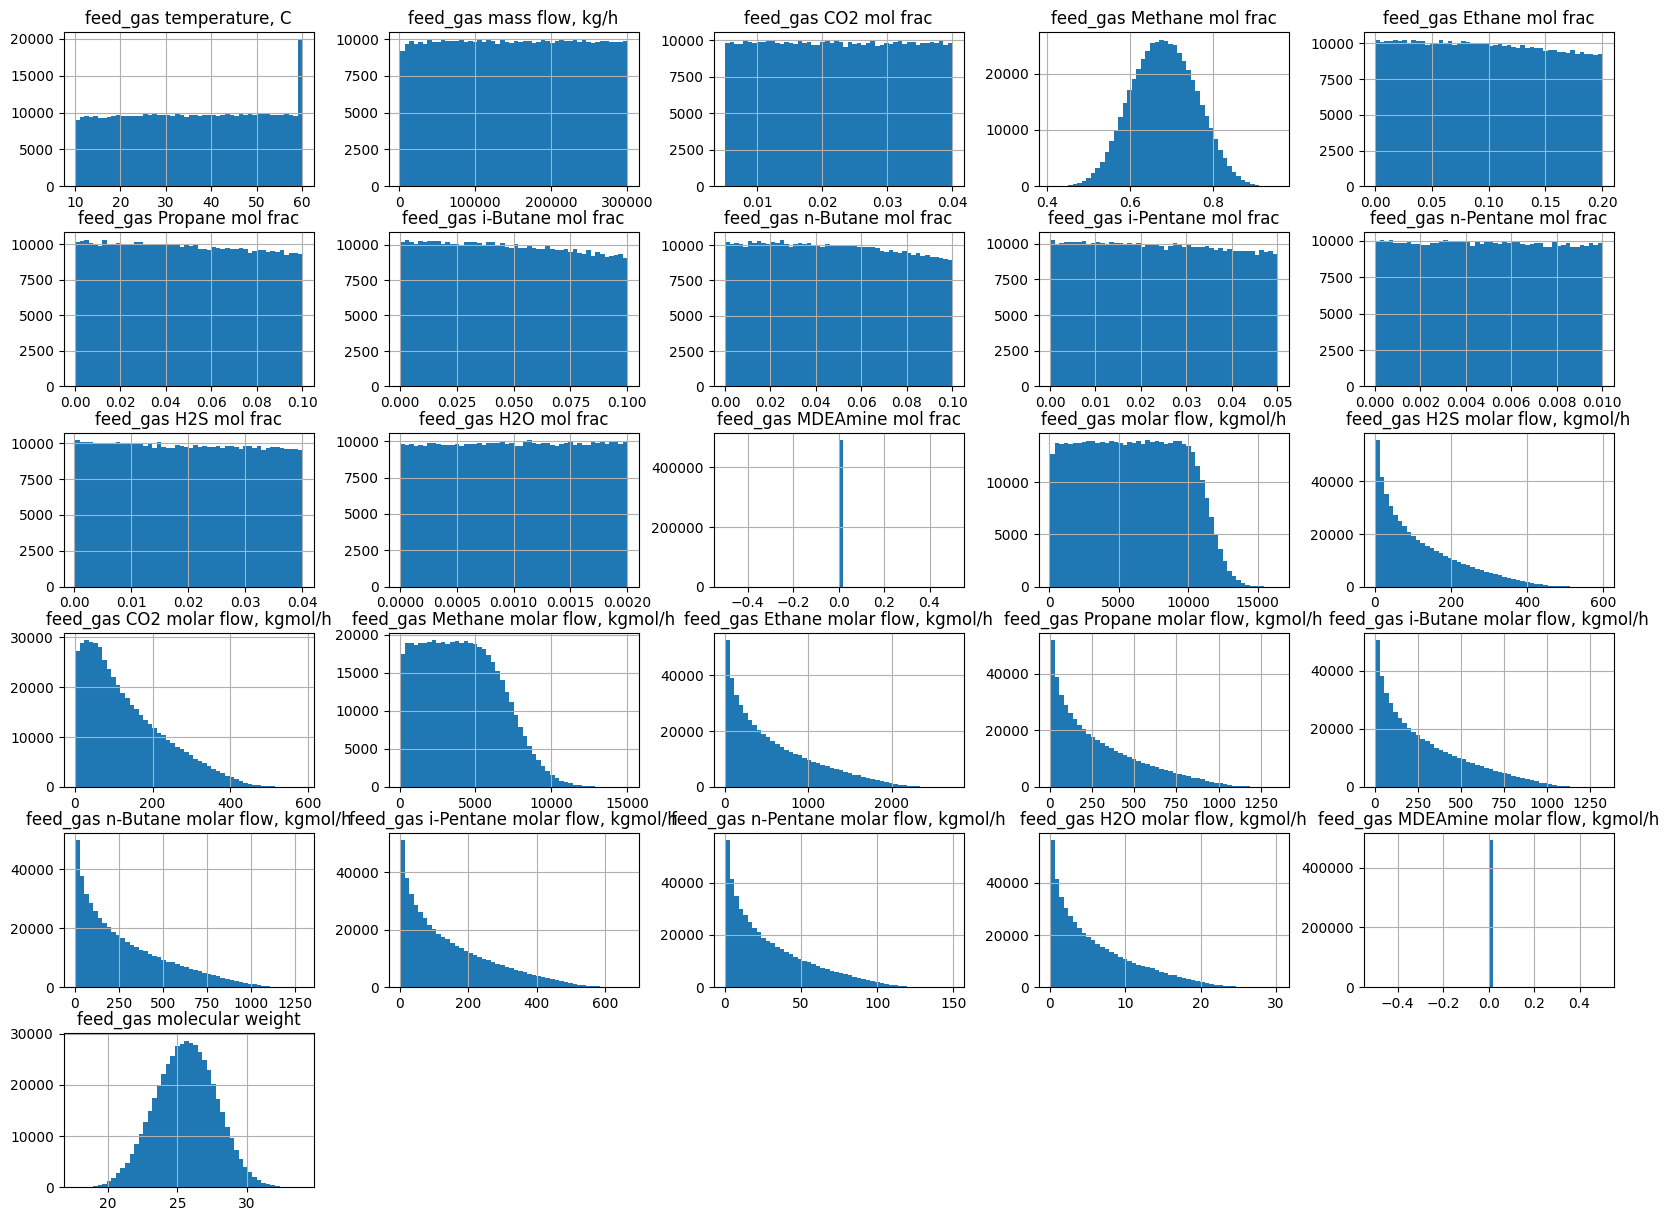

In [47]:
feed_gas_mol_weight_data.hist(bins=50, figsize=(20, 15));

In [48]:
feed_gas_mol_weight_data_mini = feed_gas_mol_weight_data.sample(frac=0.5)

In [49]:
## Тестовая и обучающая выборки
X = feed_gas_mol_weight_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
]]

y = feed_gas_mol_weight_data_mini[[
    'feed_gas molecular weight'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((196464, 25), (196464, 1))

In [50]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_0_history = feed_gas_mol_weight_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.3388 - mae: 0.3388
Epoch 2/20
6140/6140 [==============================] - 6s 1ms/step - loss: 0.0694 - mae: 0.0694
Epoch 3/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0686 - mae: 0.0686
Epoch 4/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0726 - mae: 0.0726
Epoch 5/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0672 - mae: 0.0672
Epoch 6/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0650 - mae: 0.0650
Epoch 7/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0646 - mae: 0.0646
Epoch 8/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0623 - mae: 0.0623
Epoch 9/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0612 - mae: 0.0612
Epoch 10/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0616 - mae: 0.0616
Epoch 11/20
6140/6140 [======

In [51]:
eval_0 = feed_gas_mol_weight_model_0.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 1s 772us/step - loss: 0.0511 - mae: 0.0511


In [52]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_1_history = feed_gas_mol_weight_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.2944 - mae: 0.2944
Epoch 2/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1026 - mae: 0.1026
Epoch 3/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1049 - mae: 0.1049
Epoch 4/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0955 - mae: 0.0955
Epoch 5/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0864 - mae: 0.0864
Epoch 6/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0907 - mae: 0.0907
Epoch 7/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0816 - mae: 0.0816
Epoch 8/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0832 - mae: 0.0832
Epoch 9/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.0802 - mae: 0.0802
Epoch 10/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.0767 - mae: 0.0767
Epoch 11/20
6140/6140 [======

In [53]:
eval_1 = feed_gas_mol_weight_model_1.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 1s 823us/step - loss: 0.0815 - mae: 0.0815


In [54]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_2_history = feed_gas_mol_weight_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.2868 - mae: 0.2868
Epoch 2/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1106 - mae: 0.1106
Epoch 3/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1122 - mae: 0.1122
Epoch 4/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1060 - mae: 0.1060
Epoch 5/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.1022 - mae: 0.1022
Epoch 6/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.0980 - mae: 0.0980
Epoch 7/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.0941 - mae: 0.0941
Epoch 8/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.0900 - mae: 0.0900
Epoch 9/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.0828 - mae: 0.0828
Epoch 10/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.0779 - mae: 0.0779
Epoch 11/20
6140/6140 [======

In [55]:
eval_2 = feed_gas_mol_weight_model_2.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 2s 1ms/step - loss: 0.0721 - mae: 0.0721


In [56]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_3_history = feed_gas_mol_weight_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.2777 - mae: 0.2777
Epoch 2/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.1277 - mae: 0.1277
Epoch 3/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.1223 - mae: 0.1223
Epoch 4/20
6140/6140 [==============================] - 9s 2ms/step - loss: 0.1129 - mae: 0.1129
Epoch 5/20
6140/6140 [==============================] - 9s 2ms/step - loss: 0.1109 - mae: 0.1109
Epoch 6/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1018 - mae: 0.1018
Epoch 7/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.0966 - mae: 0.0966
Epoch 8/20
6140/6140 [==============================] - 9s 2ms/step - loss: 0.0913 - mae: 0.0913
Epoch 9/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.0899 - mae: 0.0899
Epoch 10/20
6140/6140 [==============================] - 11s 2ms/step - loss: 0.0899 - mae: 0.0899
Epoch 11/20
6140/6140 [=====

In [57]:
eval_3 = feed_gas_mol_weight_model_3.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 2s 1ms/step - loss: 0.0205 - mae: 0.0205


In [58]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_4_history = feed_gas_mol_weight_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.3094 - mae: 0.3094
Epoch 2/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1180 - mae: 0.1180
Epoch 3/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1118 - mae: 0.1118
Epoch 4/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1099 - mae: 0.1099
Epoch 5/20
6140/6140 [==============================] - 7s 1ms/step - loss: 0.1084 - mae: 0.1084
Epoch 6/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.1026 - mae: 0.1026
Epoch 7/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.0939 - mae: 0.0939
Epoch 8/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.0892 - mae: 0.0892
Epoch 9/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.0893 - mae: 0.0893
Epoch 10/20
6140/6140 [==============================] - 8s 1ms/step - loss: 0.0843 - mae: 0.0843
Epoch 11/20
6140/6140 [======

In [59]:
eval_4 = feed_gas_mol_weight_model_4.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 1s 854us/step - loss: 0.0539 - mae: 0.0539


In [60]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model_5.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_5_history = feed_gas_mol_weight_model_5.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.3300 - mae: 0.3300
Epoch 2/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1865 - mae: 0.1865
Epoch 3/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1711 - mae: 0.1711
Epoch 4/20
6140/6140 [==============================] - 10s 2ms/step - loss: 0.1513 - mae: 0.1513
Epoch 5/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1481 - mae: 0.1481
Epoch 6/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1363 - mae: 0.1363
Epoch 7/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1189 - mae: 0.1189
Epoch 8/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1173 - mae: 0.1173
Epoch 9/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1231 - mae: 0.1231
Epoch 10/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1094 - mae: 0.1094
Epoch 11/20
6140/6140 [=====

In [61]:
eval_5 = feed_gas_mol_weight_model_5.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 2s 958us/step - loss: 0.0416 - mae: 0.0416


In [62]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model_6.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_6_history = feed_gas_mol_weight_model_6.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.3507 - mae: 0.3507
Epoch 2/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.2097 - mae: 0.2097
Epoch 3/20
6140/6140 [==============================] - 9s 1ms/step - loss: 0.1971 - mae: 0.1971
Epoch 4/20
6140/6140 [==============================] - 10s 2ms/step - loss: 0.1738 - mae: 0.1738
Epoch 5/20
6140/6140 [==============================] - 10s 2ms/step - loss: 0.1541 - mae: 0.1541
Epoch 6/20
6140/6140 [==============================] - 10s 2ms/step - loss: 0.1591 - mae: 0.1591
Epoch 7/20
6140/6140 [==============================] - 10s 2ms/step - loss: 0.1422 - mae: 0.1422
Epoch 8/20
6140/6140 [==============================] - 9s 2ms/step - loss: 0.1428 - mae: 0.1428
Epoch 9/20
6140/6140 [==============================] - 10s 2ms/step - loss: 0.1245 - mae: 0.1245
Epoch 10/20
6140/6140 [==============================] - 10s 2ms/step - loss: 0.1282 - mae: 0.1282
Epoch 11/20
6140/6140 [

In [63]:
eval_6 = feed_gas_mol_weight_model_6.evaluate(X_test_normal, y_test)

1535/1535 [==============================] - 2s 1000us/step - loss: 0.1024 - mae: 0.1024


In [69]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model_7.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_7_history = feed_gas_mol_weight_model_7.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
12279/12279 [==============================] - 23s 2ms/step - loss: 0.3052 - mae: 0.3052
Epoch 2/20
12279/12279 [==============================] - 27s 2ms/step - loss: 0.2019 - mae: 0.2019
Epoch 3/20
12279/12279 [==============================] - 26s 2ms/step - loss: 0.1642 - mae: 0.1642
Epoch 4/20
12279/12279 [==============================] - 27s 2ms/step - loss: 0.1377 - mae: 0.1377
Epoch 5/20
12279/12279 [==============================] - 27s 2ms/step - loss: 0.1208 - mae: 0.1208
Epoch 6/20
12279/12279 [==============================] - 27s 2ms/step - loss: 0.1033 - mae: 0.1033
Epoch 7/20
12279/12279 [==============================] - 27s 2ms/step - loss: 0.0930 - mae: 0.0930
Epoch 8/20
12279/12279 [==============================] - 26s 2ms/step - loss: 0.0868 - mae: 0.0868
Epoch 9/20
12279/12279 [==============================] - 27s 2ms/step - loss: 0.0812 - mae: 0.0812
Epoch 10/20
12279/12279 [==============================] - 26s 2ms/step - loss: 0.0743 - mae: 0.0743

In [70]:
eval_7 = feed_gas_mol_weight_model_7.evaluate(X_test_normal, y_test)

3070/3070 [==============================] - 3s 1ms/step - loss: 0.0485 - mae: 0.0485


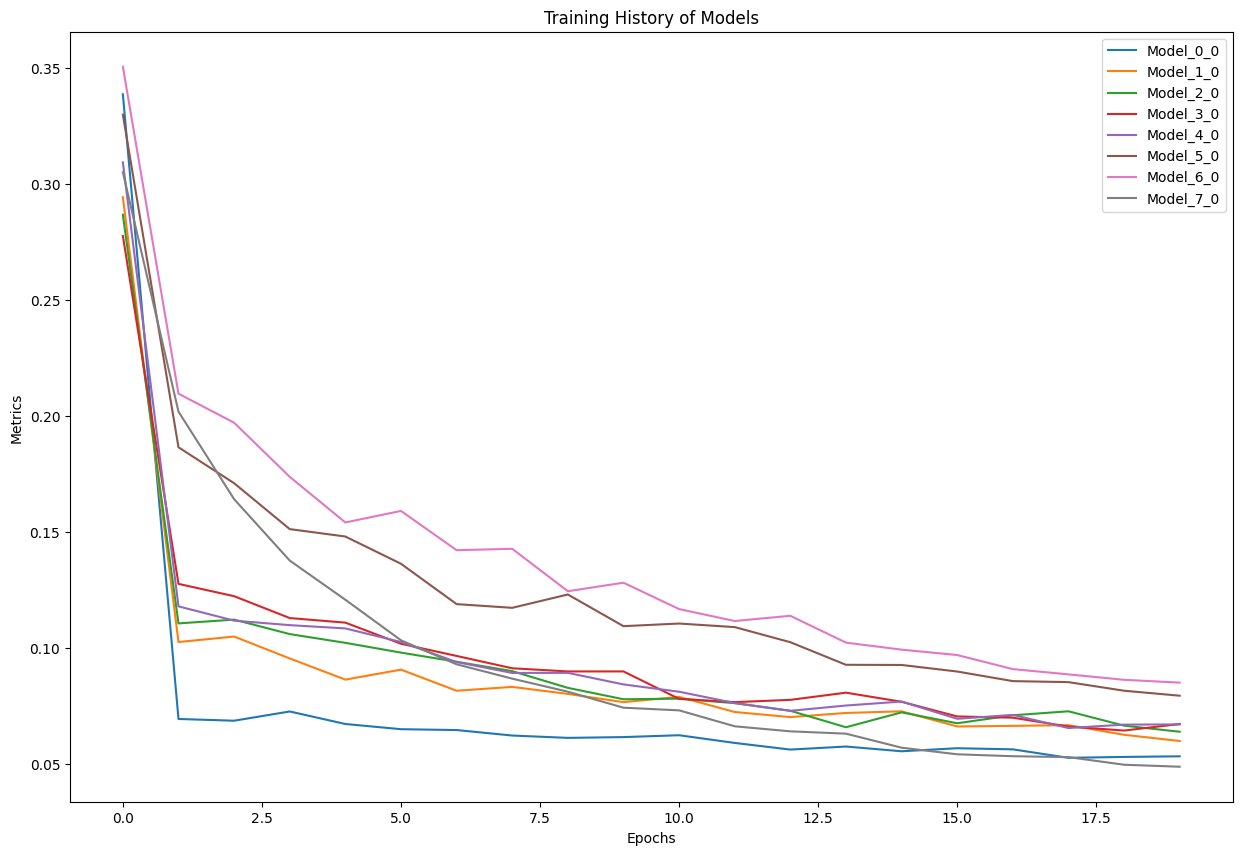

In [71]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(feed_gas_mol_weight_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(feed_gas_mol_weight_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(feed_gas_mol_weight_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(feed_gas_mol_weight_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(feed_gas_mol_weight_4_history.history['loss']).add_prefix('Model_4_')
history_5_df = pd.DataFrame(feed_gas_mol_weight_5_history.history['loss']).add_prefix('Model_5_')
history_6_df = pd.DataFrame(feed_gas_mol_weight_6_history.history['loss']).add_prefix('Model_6_')
history_7_df = pd.DataFrame(feed_gas_mol_weight_7_history.history['loss']).add_prefix('Model_7_')

# Объединение всех DataFrame в один
combined_df = pd.concat([
    history_0_df, history_1_df, history_2_df,
    history_3_df, history_4_df, history_5_df,
    history_6_df, history_7_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

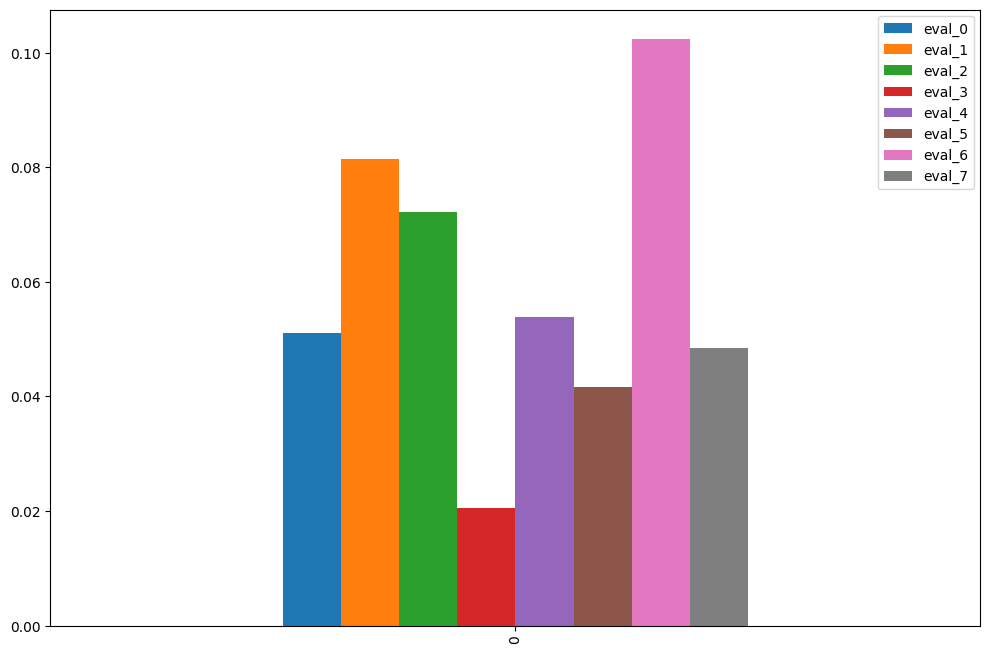

In [72]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
    'eval_5': eval_5[1],
    'eval_6': eval_6[1],
    'eval_7': eval_7[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения молярного веса сырьевого газа

In [73]:
## Тестовая и обучающая выборки
X = feed_gas_mol_weight_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
]]

y = feed_gas_mol_weight_data[[
    'feed_gas molecular weight'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

joblib.dump(ct, './column_transformers/amine_treatment_24_08/feed_gas_mol_weight_transformer.pkl')

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((392928, 25), (392928, 1))

In [74]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_mol_weight_model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_mol_weight_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_mol_weight_history = feed_gas_mol_weight_model.fit(X_train_normal, y_train, epochs=40)

Epoch 1/40
12279/12279 [==============================] - 17s 1ms/step - loss: 0.1975 - mae: 0.1975
Epoch 2/40
12279/12279 [==============================] - 16s 1ms/step - loss: 0.1148 - mae: 0.1148
Epoch 3/40
12279/12279 [==============================] - 18s 2ms/step - loss: 0.1004 - mae: 0.1004
Epoch 4/40
12279/12279 [==============================] - 18s 1ms/step - loss: 0.0914 - mae: 0.0914
Epoch 5/40
12279/12279 [==============================] - 18s 1ms/step - loss: 0.0845 - mae: 0.0845
Epoch 6/40
12279/12279 [==============================] - 18s 1ms/step - loss: 0.0804 - mae: 0.0804
Epoch 7/40
12279/12279 [==============================] - 18s 1ms/step - loss: 0.0806 - mae: 0.0806
Epoch 8/40
12279/12279 [==============================] - 18s 1ms/step - loss: 0.0741 - mae: 0.0741
Epoch 9/40
12279/12279 [==============================] - 20s 2ms/step - loss: 0.0712 - mae: 0.0712
Epoch 10/40
12279/12279 [==============================] - 19s 2ms/step - loss: 0.0702 - mae: 0.0702

In [75]:
feed_gas_mol_weight_model.evaluate(X_test_normal, y_test)

3070/3070 [==============================] - 3s 1ms/step - loss: 0.0171 - mae: 0.0171


[0.017092514783143997, 0.017092514783143997]

In [77]:
y_pred = feed_gas_mol_weight_model.predict(X_test_normal)

3070/3070 [==============================] - 3s 889us/step


In [78]:
y_pred

array([[26.621222],
       [28.094011],
       [25.76294 ],
       ...,
       [24.291916],
       [27.773275],
       [26.737701]], dtype=float32)

In [79]:
y_test

,feed_gas molecular weight
65378,26.582246
260317,28.077095
250559,25.762297
272868,22.943948
395693,26.755247
...,...
412305,26.982399
112394,25.495049
65081,24.282884
247040,27.763948


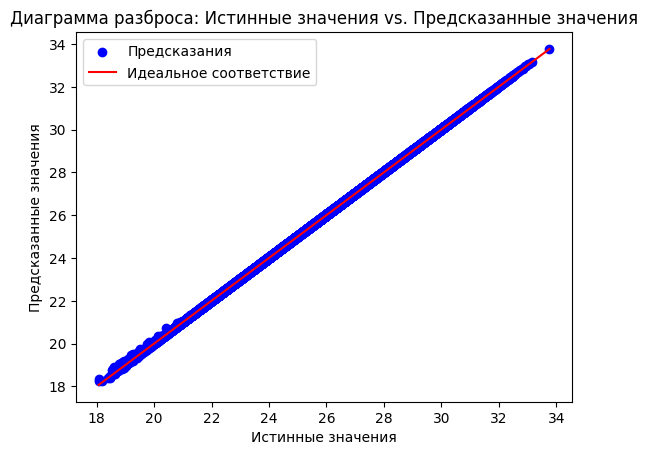

In [80]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [81]:
feed_gas_mol_weight_model.save('./models/amine_treatment_24_08/feed_gas_mol_weight_model.h5')

# Определение молярной массы регенерированного амина

In [82]:
lean_amine_mol_weight_data = data[[
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac',
    'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
    'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'lean_amine molecular weight'
]]

In [84]:
## Тестовая и обучающая выборки
X = lean_amine_mol_weight_data[[
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac',
    'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
    'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    
]]

y = lean_amine_mol_weight_data[[
    'lean_amine molecular weight'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac',
    'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
    'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

joblib.dump(ct, './column_transformers/amine_treatment_24_08/lean_amine_mol_weight_transformer.pkl')

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((392928, 25), (392928, 1))

In [85]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_mol_weight_model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_mol_weight_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_mol_weight_history = lean_amine_mol_weight_model.fit(X_train_normal, y_train, epochs=40)

Epoch 1/40
12279/12279 [==============================] - 18s 1ms/step - loss: 0.2571 - mae: 0.2571
Epoch 2/40
12279/12279 [==============================] - 19s 2ms/step - loss: 0.1210 - mae: 0.1210
Epoch 3/40
12279/12279 [==============================] - 20s 2ms/step - loss: 0.1132 - mae: 0.1132
Epoch 4/40
12279/12279 [==============================] - 20s 2ms/step - loss: 0.1065 - mae: 0.1065
Epoch 5/40
12279/12279 [==============================] - 20s 2ms/step - loss: 0.1090 - mae: 0.1090
Epoch 6/40
12279/12279 [==============================] - 19s 2ms/step - loss: 0.0995 - mae: 0.0995
Epoch 7/40
12279/12279 [==============================] - 20s 2ms/step - loss: 0.1006 - mae: 0.1006
Epoch 8/40
12279/12279 [==============================] - 19s 2ms/step - loss: 0.0922 - mae: 0.0922
Epoch 9/40
12279/12279 [==============================] - 20s 2ms/step - loss: 0.0905 - mae: 0.0905
Epoch 10/40
12279/12279 [==============================] - 20s 2ms/step - loss: 0.0904 - mae: 0.0904

In [86]:
lean_amine_mol_weight_model.evaluate(X_test_normal, y_test)

3070/3070 [==============================] - 3s 1ms/step - loss: 0.0179 - mae: 0.0179


[0.017921991646289825, 0.017921991646289825]

In [88]:
y_pred = lean_amine_mol_weight_model.predict(X_test_normal)

3070/3070 [==============================] - 3s 817us/step


In [89]:
y_pred

array([[32.71736 ],
       [26.94153 ],
       [37.997585],
       ...,
       [27.722979],
       [38.99761 ],
       [33.179356]], dtype=float32)

In [90]:
y_test

,lean_amine molecular weight
65378,32.740766
260317,26.928398
250559,38.021993
272868,33.942192
395693,29.977523
...,...
412305,31.935703
112394,32.350386
65081,27.709549
247040,39.029601


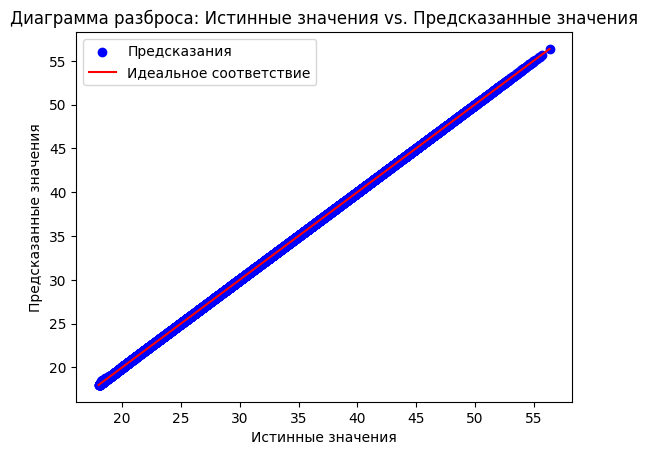

In [91]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [92]:
lean_amine_mol_weight_model.save('./models/amine_treatment_24_08/lean_amine_mol_weight_model.h5')

# Определение плотности сырьевого газа

In [13]:
feed_gas_dens_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3'
]]

In [14]:
feed_gas_dens_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,feed_gas Propane mol frac,feed_gas i-Butane mol frac,feed_gas n-Butane mol frac,feed_gas i-Pentane mol frac,feed_gas n-Pentane mol frac,...,"feed_gas Ethane molar flow, kgmol/h","feed_gas Propane molar flow, kgmol/h","feed_gas i-Butane molar flow, kgmol/h","feed_gas n-Butane molar flow, kgmol/h","feed_gas i-Pentane molar flow, kgmol/h","feed_gas n-Pentane molar flow, kgmol/h","feed_gas H2O molar flow, kgmol/h","feed_gas MDEAmine molar flow, kgmol/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3"
count,291982.000000,291982.000000,291982.000000,291982.000000,2.919820e+05,2.919820e+05,2.919820e+05,2.919820e+05,2.919820e+05,2.919820e+05,...,291982.000000,291982.000000,291982.000000,291982.000000,291982.000000,291982.000000,291982.000000,291982.0,291982.000000,291982.000000
mean,43.103722,150984.850025,0.022526,0.682502,9.778395e-02,4.916639e-02,4.891707e-02,4.877153e-02,2.462297e-02,4.983985e-03,...,572.538974,287.826648,283.852238,283.067283,143.982540,29.570327,4.630528,0.0,25.557014,97.166137
std,12.311126,86147.537943,0.010107,0.076789,5.756790e-02,2.878949e-02,2.875291e-02,2.865985e-02,1.441066e-02,2.887469e-03,...,500.530018,250.807574,245.328766,244.625441,125.378249,26.079551,4.649553,0.0,2.169166,26.778794
min,10.000000,1000.000000,0.005000,0.408325,1.653950e-07,2.931284e-07,2.457075e-07,7.172592e-08,3.127614e-08,2.484760e-08,...,0.001987,0.000202,0.000689,0.000241,0.000017,0.000269,0.000004,0.0,17.776590,48.732168
25%,35.000000,76386.500000,0.013762,0.627781,4.775349e-02,2.423307e-02,2.395738e-02,2.393795e-02,1.208985e-02,2.488689e-03,...,159.717478,80.441477,80.740879,80.331467,40.393601,8.099551,1.052215,0.0,24.064073,80.467156
50%,46.000000,151115.000000,0.022520,0.682096,9.651630e-02,4.870205e-02,4.835223e-02,4.822257e-02,2.445512e-02,4.978830e-03,...,431.180245,217.416456,215.812224,215.034108,108.682350,22.056565,3.034554,0.0,25.581912,91.646174
75%,53.000000,225577.750000,0.031297,0.737069,1.472000e-01,7.393294e-02,7.361439e-02,7.327017e-02,3.701891e-02,7.473583e-03,...,873.839272,439.404042,433.228277,431.865485,219.907116,45.095217,6.814782,0.0,27.063958,106.326865
max,60.000000,299995.000000,0.040000,0.943432,1.999997e-01,9.999965e-02,9.999934e-02,9.999981e-02,4.999978e-02,9.999939e-03,...,2728.899406,1328.635576,1294.897194,1291.824482,653.333963,147.299094,28.629961,0.0,33.889644,338.439095


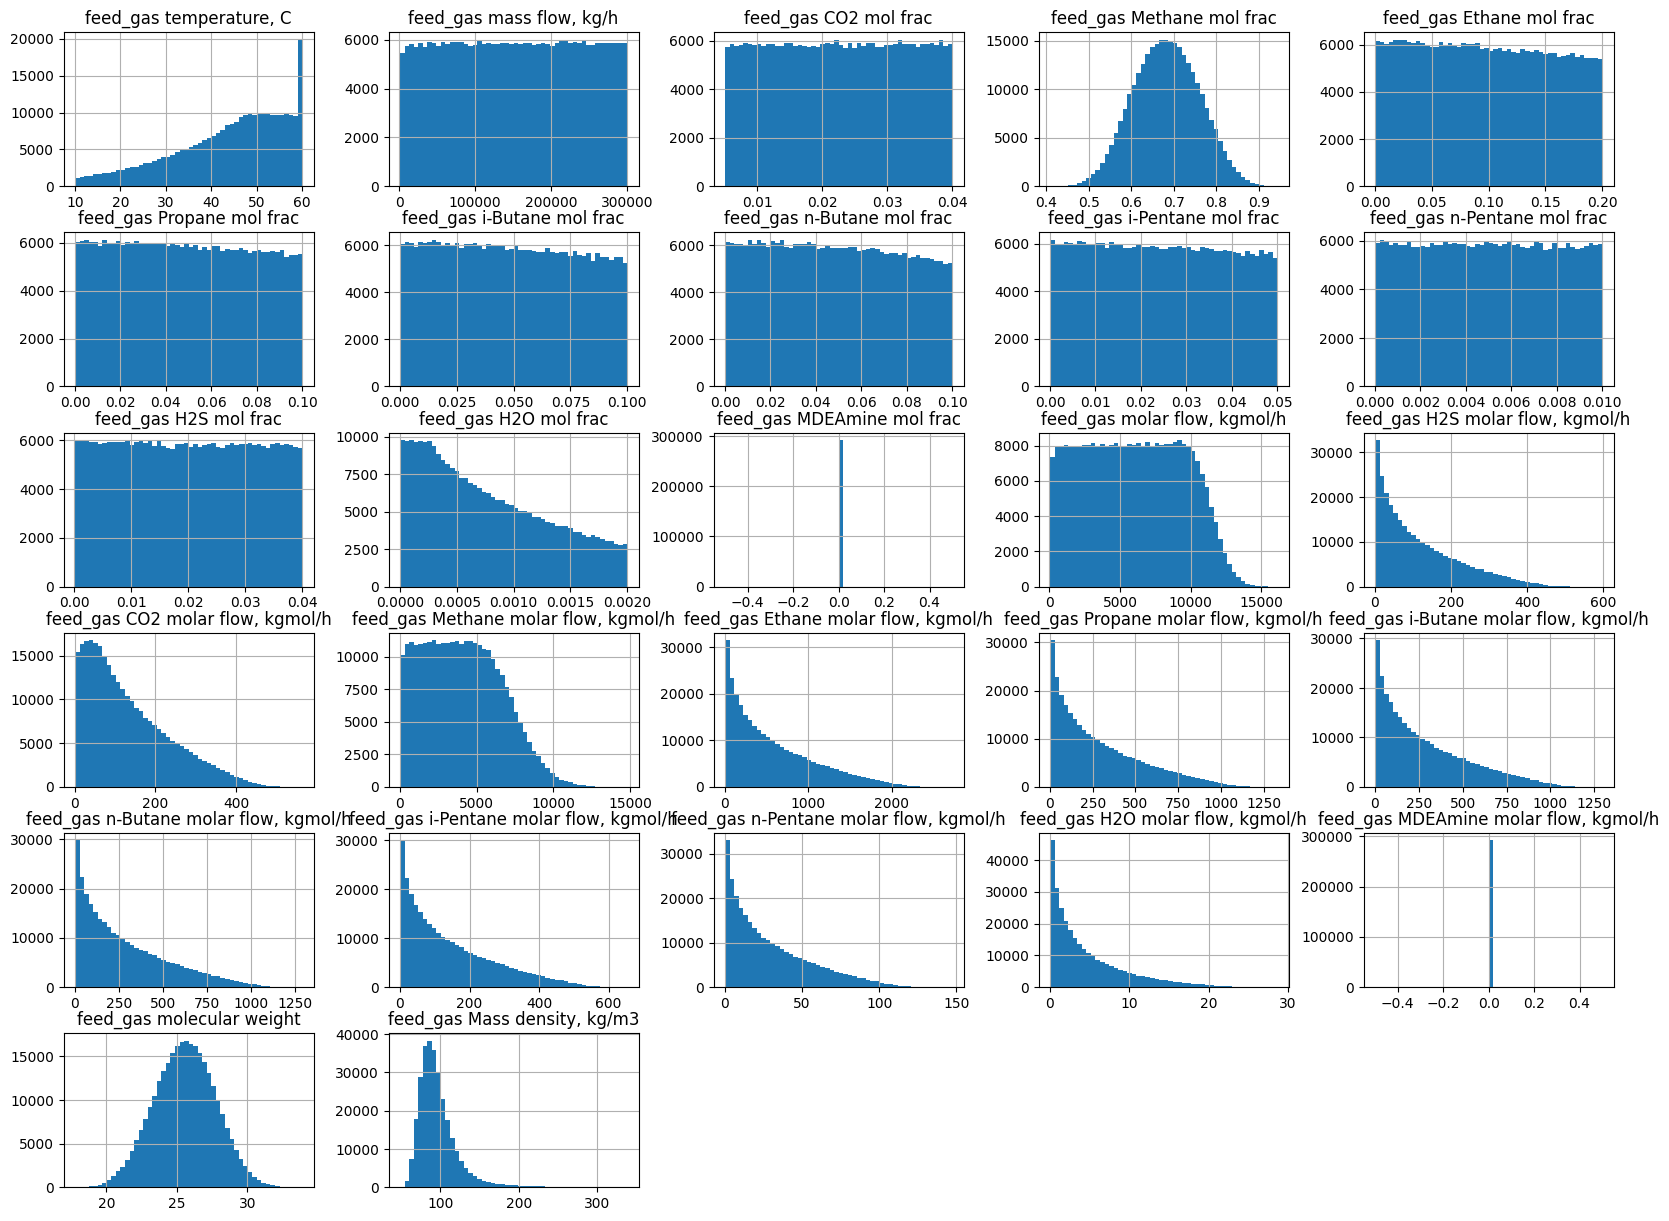

In [15]:
feed_gas_dens_data.hist(bins=50, figsize=(20, 15));

In [16]:
feed_gas_dens_data_mini = feed_gas_dens_data.sample(frac=0.5)

In [17]:
## Тестовая и обучающая выборки
X = feed_gas_dens_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 'feed_gas molecular weight'
]]

y = feed_gas_dens_data_mini[[
    'feed_gas Mass density, kg/m3'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 'feed_gas molecular weight'
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

joblib.dump(ct, './column_transformers/amine_treatment_24_08/feed_gas_dens_transformer.pkl')

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((116792, 26), (116792, 1))

In [18]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_dens_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_dens_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_dens_0_history = feed_gas_dens_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 4s 1ms/step - loss: 4.8383 - mae: 4.8383
Epoch 2/20
3650/3650 [==============================] - 3s 955us/step - loss: 0.6092 - mae: 0.6092
Epoch 3/20
3650/3650 [==============================] - 3s 948us/step - loss: 0.4205 - mae: 0.4205
Epoch 4/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3694 - mae: 0.3694
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3480 - mae: 0.3480
Epoch 6/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3244 - mae: 0.3244
Epoch 7/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3179 - mae: 0.3179
Epoch 8/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3034 - mae: 0.3034
Epoch 9/20
3650/3650 [==============================] - 4s 955us/step - loss: 0.3014 - mae: 0.3014
Epoch 10/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.2973 - mae: 0.2973
Epoch 11/20
3650/3650 [

In [19]:
eval_0 = feed_gas_dens_model_0.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 923us/step - loss: 0.2172 - mae: 0.2172


In [20]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_dens_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_dens_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_dens_1_history = feed_gas_dens_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 5s 1ms/step - loss: 3.8810 - mae: 3.8810
Epoch 2/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5717 - mae: 0.5717
Epoch 3/20
3650/3650 [==============================] - 4s 979us/step - loss: 0.4648 - mae: 0.4648
Epoch 4/20
3650/3650 [==============================] - 3s 904us/step - loss: 0.4268 - mae: 0.4268
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.4014 - mae: 0.4014
Epoch 6/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3963 - mae: 0.3963
Epoch 7/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3755 - mae: 0.3755
Epoch 8/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3615 - mae: 0.3615
Epoch 9/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.3550 - mae: 0.3550
Epoch 10/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.3439 - mae: 0.3439
Epoch 11/20
3650/3650 [==

In [21]:
eval_1 = feed_gas_dens_model_1.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 740us/step - loss: 0.3207 - mae: 0.3207


In [22]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_dens_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_dens_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_dens_2_history = feed_gas_dens_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 5s 1ms/step - loss: 3.3167 - mae: 3.3167
Epoch 2/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5405 - mae: 0.5405
Epoch 3/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.4991 - mae: 0.4991
Epoch 4/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.4443 - mae: 0.4443
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.4457 - mae: 0.4457
Epoch 6/20
3650/3650 [==============================] - 4s 961us/step - loss: 0.4356 - mae: 0.4356
Epoch 7/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.4176 - mae: 0.4176
Epoch 8/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.4237 - mae: 0.4237
Epoch 9/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.4075 - mae: 0.4075
Epoch 10/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.4028 - mae: 0.4028
Epoch 11/20
3650/3650 [====

In [23]:
eval_2 = feed_gas_dens_model_2.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 899us/step - loss: 0.5017 - mae: 0.5017


In [24]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_dens_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_dens_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_dens_3_history = feed_gas_dens_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 5s 1ms/step - loss: 3.6528 - mae: 3.6528
Epoch 2/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.6872 - mae: 0.6872
Epoch 3/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5859 - mae: 0.5859
Epoch 4/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5543 - mae: 0.5543
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5298 - mae: 0.5298
Epoch 6/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5130 - mae: 0.5130
Epoch 7/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5030 - mae: 0.5030
Epoch 8/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5041 - mae: 0.5041
Epoch 9/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.4845 - mae: 0.4845
Epoch 10/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.4480 - mae: 0.4480
Epoch 11/20
3650/3650 [======

In [25]:
eval_3 = feed_gas_dens_model_3.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 934us/step - loss: 0.9788 - mae: 0.9788


In [26]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_dens_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_dens_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_dens_4_history = feed_gas_dens_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 6s 1ms/step - loss: 2.7583 - mae: 2.7583
Epoch 2/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.8184 - mae: 0.8184
Epoch 3/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.7336 - mae: 0.7336
Epoch 4/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.6980 - mae: 0.6980
Epoch 5/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.6834 - mae: 0.6834
Epoch 6/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.6767 - mae: 0.6767
Epoch 7/20
3650/3650 [==============================] - 6s 2ms/step - loss: 0.6206 - mae: 0.6206
Epoch 8/20
3650/3650 [==============================] - 6s 2ms/step - loss: 0.5969 - mae: 0.5969
Epoch 9/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.5956 - mae: 0.5956
Epoch 10/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.5827 - mae: 0.5827
Epoch 11/20
3650/3650 [======

In [27]:
eval_4 = feed_gas_dens_model_4.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 666us/step - loss: 0.3164 - mae: 0.3164


In [28]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_dens_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_dens_model_5.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_dens_5_history = feed_gas_dens_model_5.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 5s 1ms/step - loss: 2.8411 - mae: 2.8411
Epoch 2/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.9654 - mae: 0.9654
Epoch 3/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.8912 - mae: 0.8912
Epoch 4/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.8185 - mae: 0.8185
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 0.7991 - mae: 0.7991
Epoch 6/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.7530 - mae: 0.7530
Epoch 7/20
3650/3650 [==============================] - 6s 2ms/step - loss: 0.7370 - mae: 0.7370
Epoch 8/20
3650/3650 [==============================] - 6s 2ms/step - loss: 0.7048 - mae: 0.7048
Epoch 9/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.6448 - mae: 0.6448
Epoch 10/20
3650/3650 [==============================] - 5s 1ms/step - loss: 0.6652 - mae: 0.6652
Epoch 11/20
3650/3650 [======

In [29]:
eval_5 = feed_gas_dens_model_5.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 901us/step - loss: 0.4150 - mae: 0.4150


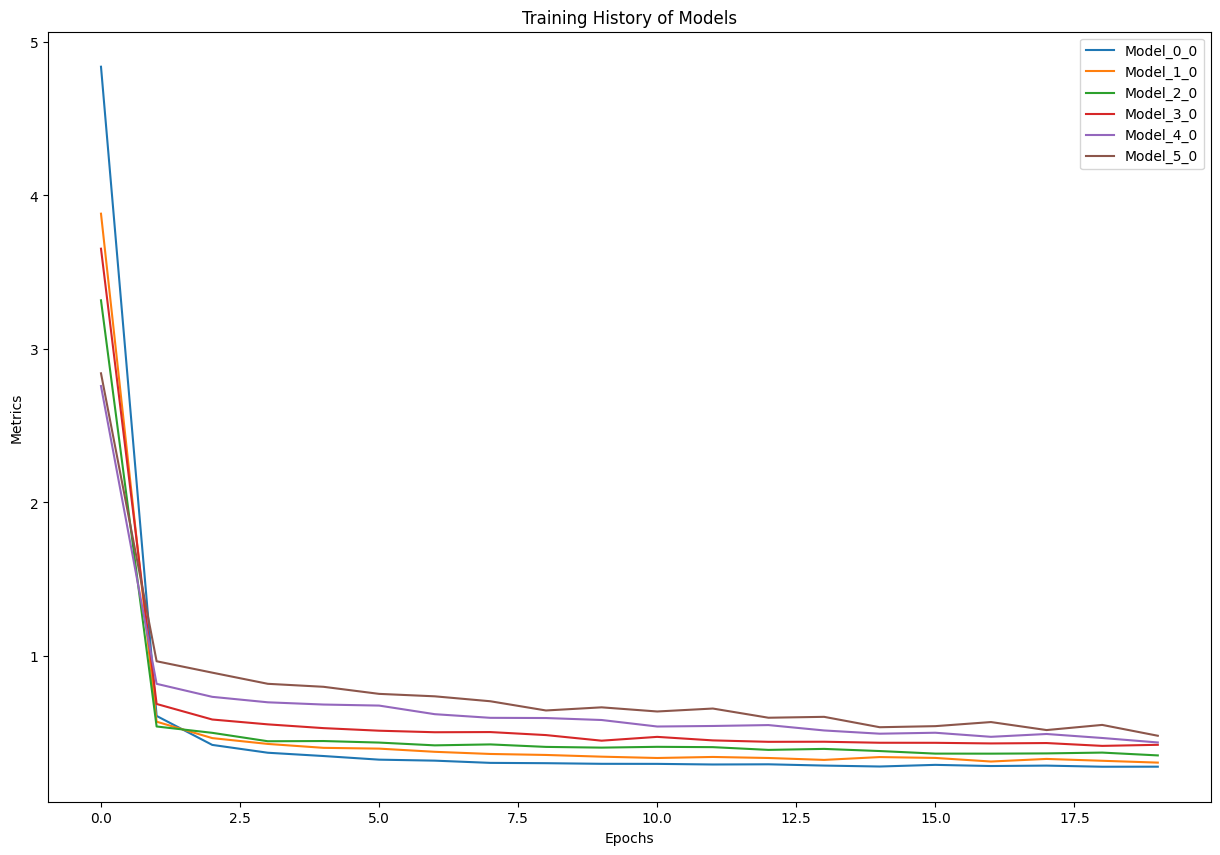

In [30]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(feed_gas_dens_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(feed_gas_dens_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(feed_gas_dens_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(feed_gas_dens_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(feed_gas_dens_4_history.history['loss']).add_prefix('Model_4_')
history_5_df = pd.DataFrame(feed_gas_dens_5_history.history['loss']).add_prefix('Model_5_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df, history_5_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

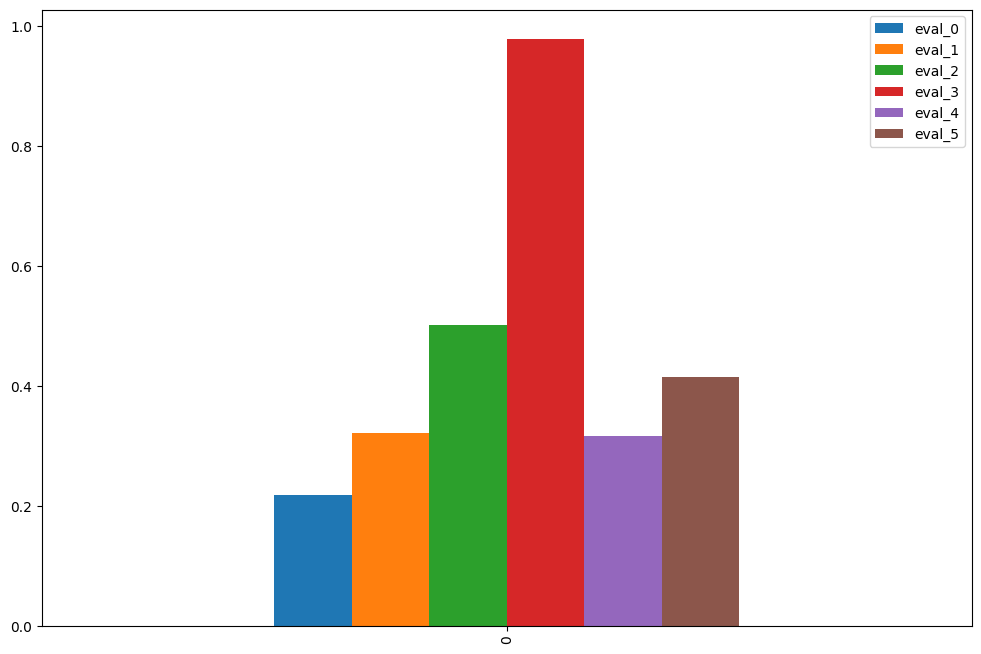

In [31]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
    'eval_5': eval_5[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения плотности сырьевого газа

In [32]:
## Тестовая и обучающая выборки
X = feed_gas_dens_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 'feed_gas molecular weight'
]]

y = feed_gas_dens_data[[
    'feed_gas Mass density, kg/m3'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas CO2 mol frac', 'feed_gas Methane mol frac',
    'feed_gas Ethane mol frac', 'feed_gas Propane mol frac', 'feed_gas i-Butane mol frac', 'feed_gas n-Butane mol frac',
    'feed_gas i-Pentane mol frac', 'feed_gas n-Pentane mol frac', 'feed_gas H2S mol frac', 'feed_gas H2O mol frac',
    'feed_gas MDEAmine mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'feed_gas MDEAmine molar flow, kgmol/h', 'feed_gas molecular weight'
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

joblib.dump(ct, './column_transformers/amine_treatment_24_08/feed_gas_dens_transformer.pkl')

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((233585, 26), (233585, 1))

In [33]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
feed_gas_dens_model = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
feed_gas_dens_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
feed_gas_dens_history = feed_gas_dens_model.fit(X_train_normal, y_train, epochs=40)

Epoch 1/40
7300/7300 [==============================] - 7s 902us/step - loss: 2.7224 - mae: 2.7224
Epoch 2/40
7300/7300 [==============================] - 8s 1ms/step - loss: 0.4310 - mae: 0.4310
Epoch 3/40
7300/7300 [==============================] - 8s 1ms/step - loss: 0.3781 - mae: 0.3781
Epoch 4/40
7300/7300 [==============================] - 8s 1ms/step - loss: 0.3695 - mae: 0.3695
Epoch 5/40
7300/7300 [==============================] - 8s 1ms/step - loss: 0.3531 - mae: 0.3531
Epoch 6/40
7300/7300 [==============================] - 8s 1ms/step - loss: 0.3345 - mae: 0.3345
Epoch 7/40
7300/7300 [==============================] - 8s 1ms/step - loss: 0.3224 - mae: 0.3224
Epoch 8/40
7300/7300 [==============================] - 9s 1ms/step - loss: 0.3123 - mae: 0.3123
Epoch 9/40
7300/7300 [==============================] - 9s 1ms/step - loss: 0.3121 - mae: 0.3121
Epoch 10/40
7300/7300 [==============================] - 8s 1ms/step - loss: 0.3021 - mae: 0.3021
Epoch 11/40
7300/7300 [====

In [34]:
feed_gas_dens_model.evaluate(X_test_normal, y_test)

1825/1825 [==============================] - 2s 870us/step - loss: 0.1943 - mae: 0.1943


[0.1943427175283432, 0.1943427175283432]

In [35]:
y_pred = feed_gas_dens_model.predict(X_test_normal)

1825/1825 [==============================] - 2s 979us/step


In [36]:
y_pred

array([[96.98521 ],
       [80.04734 ],
       [99.940735],
       ...,
       [56.813507],
       [59.034603],
       [81.8768  ]], dtype=float32)

In [37]:
y_test

,"feed_gas Mass density, kg/m3"
331272,97.039212
309820,79.909185
265990,99.914867
251873,94.413720
206275,295.492740
...,...
467512,117.353842
434437,84.309867
356621,56.691443
416607,58.816351


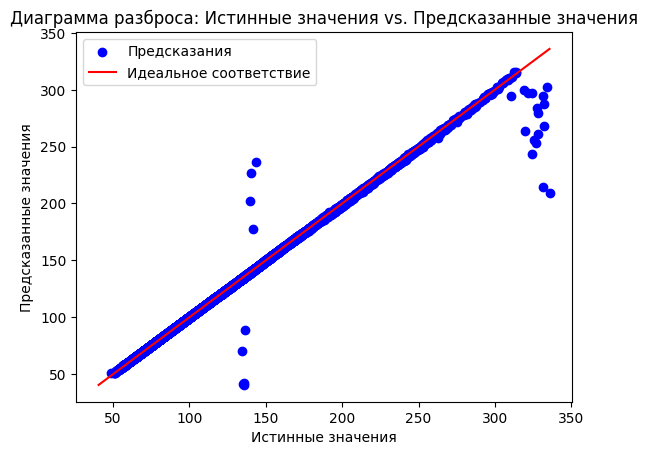

In [38]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [39]:
feed_gas_dens_model.save('./models/amine_treatment_24_08/feed_gas_dens_model.h5')

# Определение плотности регенерированного амина

In [42]:
lean_amine_dens_data = data[[
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac',
    'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
    'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'lean_amine molecular weight', 'lean_amine Mass density, kg/m3'
]]

In [43]:
lean_amine_dens_data.describe()

,"lean_amine temperature, C","lean_amine mass flow, kg/h",lean_amine CO2 mol frac,lean_amine Methane mol frac,lean_amine Ethane mol frac,lean_amine Propane mol frac,lean_amine i-Butane mol frac,lean_amine n-Butane mol frac,lean_amine i-Pentane mol frac,lean_amine n-Pentane mol frac,...,"lean_amine Ethane molar flow, kgmol/h","lean_amine Propane molar flow, kgmol/h","lean_amine i-Butane molar flow, kgmol/h","lean_amine n-Butane molar flow, kgmol/h","lean_amine i-Pentane molar flow, kgmol/h","lean_amine n-Pentane molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h",lean_amine molecular weight,"lean_amine Mass density, kg/m3"
count,291982.000000,291982.000000,291982.000000,291982.0,291982.0,291982.0,291982.0,291982.0,291982.0,291982.0,...,291982.0,291982.0,291982.0,291982.0,291982.0,291982.0,291982.000000,291982.000000,291982.000000,291982.000000
mean,35.712852,358022.309433,0.002904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9915.633681,1492.305853,32.746298,1039.859021
std,14.480572,196635.261543,0.001212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6502.432195,982.106951,6.565697,13.889946
min,10.000000,15000.000000,0.000800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,194.673346,0.012332,18.043180,974.857513
25%,23.000000,188271.000000,0.001857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4788.434179,645.976338,28.104430,1032.167172
50%,36.000000,357084.000000,0.002905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9116.947303,1366.013167,33.807386,1041.014070
75%,48.000000,528026.750000,0.003952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13694.485572,2244.854901,37.524522,1050.142420
max,60.000000,700000.000000,0.005000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38352.955466,4640.158398,56.744250,1070.851770


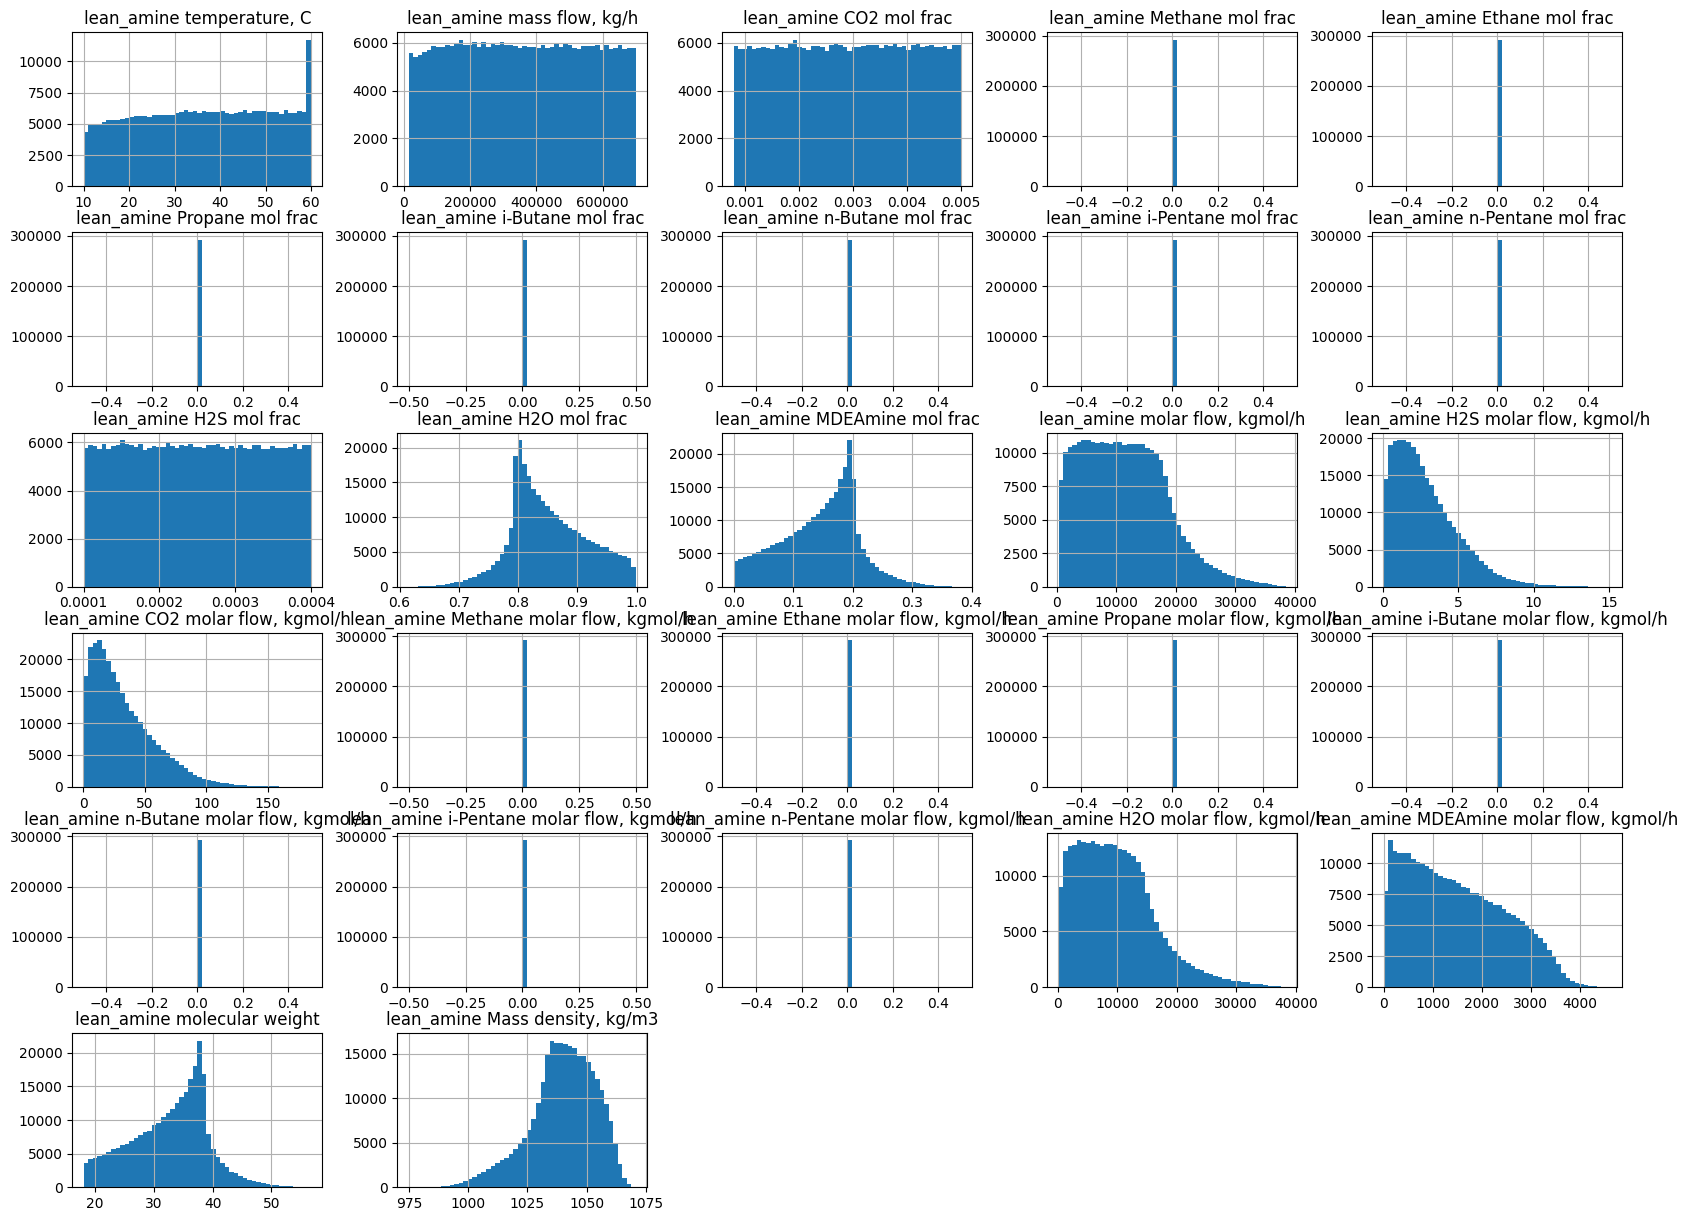

In [44]:
lean_amine_dens_data.hist(bins=50, figsize=(20, 15));

In [57]:
lean_amine_dens_data_mini = lean_amine_dens_data.sample(frac=0.5)

In [58]:
## Тестовая и обучающая выборки
X = lean_amine_dens_data_mini[[
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac',
    'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
    'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'lean_amine molecular weight', 
]]

y = lean_amine_dens_data_mini[[
    'lean_amine Mass density, kg/m3'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac',
    'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
    'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'lean_amine molecular weight', 
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

joblib.dump(ct, './column_transformers/amine_treatment_24_08/lean_amine_dens_transformer.pkl')

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((116792, 26), (116792, 1))

In [59]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_dens_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_dens_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_dens_0_history = lean_amine_dens_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 5s 1ms/step - loss: 55.7243 - mae: 55.7243
Epoch 2/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7291 - mae: 2.7291
Epoch 3/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.6875 - mae: 2.6875
Epoch 4/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7245 - mae: 2.7245
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.6826 - mae: 2.6826
Epoch 6/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7319 - mae: 2.7319
Epoch 7/20
3650/3650 [==============================] - 3s 851us/step - loss: 2.7130 - mae: 2.7130
Epoch 8/20
3650/3650 [==============================] - 3s 866us/step - loss: 2.7062 - mae: 2.7062
Epoch 9/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7039 - mae: 2.7039
Epoch 10/20
3650/3650 [==============================] - 3s 933us/step - loss: 2.7272 - mae: 2.7272
Epoch 11/20
3650/3650

In [60]:
eval_0 = lean_amine_dens_model_0.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 737us/step - loss: 2.7311 - mae: 2.7311


In [61]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_dens_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_dens_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_dens_1_history = lean_amine_dens_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 4s 1ms/step - loss: 44.6841 - mae: 44.6841
Epoch 2/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.8463 - mae: 2.8463
Epoch 3/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.8027 - mae: 2.8027
Epoch 4/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.8093 - mae: 2.8093
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.8214 - mae: 2.8214
Epoch 6/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.8010 - mae: 2.8010
Epoch 7/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7531 - mae: 2.7531
Epoch 8/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7591 - mae: 2.7591
Epoch 9/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7283 - mae: 2.7283
Epoch 10/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7129 - mae: 2.7129
Epoch 11/20
3650/3650 [====

In [62]:
eval_1 = lean_amine_dens_model_1.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 1ms/step - loss: 2.7668 - mae: 2.7668


In [63]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_dens_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_dens_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_dens_2_history = lean_amine_dens_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 4s 913us/step - loss: 36.4678 - mae: 36.4678
Epoch 2/20
3650/3650 [==============================] - 3s 947us/step - loss: 2.9694 - mae: 2.9694
Epoch 3/20
3650/3650 [==============================] - 3s 945us/step - loss: 2.9820 - mae: 2.9820
Epoch 4/20
3650/3650 [==============================] - 3s 948us/step - loss: 3.0013 - mae: 3.0013
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 3.0375 - mae: 3.0375
Epoch 6/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.9850 - mae: 2.9850
Epoch 7/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.9677 - mae: 2.9677
Epoch 8/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.9674 - mae: 2.9674
Epoch 9/20
3650/3650 [==============================] - 5s 1ms/step - loss: 3.0147 - mae: 3.0147
Epoch 10/20
3650/3650 [==============================] - 4s 1ms/step - loss: 3.0033 - mae: 3.0033
Epoch 11/20
3650/36

In [64]:
eval_2 = lean_amine_dens_model_2.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 732us/step - loss: 2.3383 - mae: 2.3383


In [65]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_dens_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_dens_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_dens_3_history = lean_amine_dens_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 5s 1ms/step - loss: 35.5532 - mae: 35.5532
Epoch 2/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7734 - mae: 2.7734
Epoch 3/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.5150 - mae: 2.5150
Epoch 4/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7282 - mae: 2.7282
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7168 - mae: 2.7168
Epoch 6/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.7098 - mae: 2.7098
Epoch 7/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.5323 - mae: 2.5323
Epoch 8/20
3650/3650 [==============================] - 5s 1ms/step - loss: 2.6479 - mae: 2.6479
Epoch 9/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.5995 - mae: 2.5995
Epoch 10/20
3650/3650 [==============================] - 4s 1ms/step - loss: 2.6437 - mae: 2.6437
Epoch 11/20
3650/3650 [====

In [66]:
eval_3 = lean_amine_dens_model_3.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 1ms/step - loss: 0.9354 - mae: 0.9354


In [67]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_dens_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_dens_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_dens_4_history = lean_amine_dens_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 5s 1ms/step - loss: 25.4200 - mae: 25.4200
Epoch 2/20
3650/3650 [==============================] - 4s 1ms/step - loss: 4.5872 - mae: 4.5872
Epoch 3/20
3650/3650 [==============================] - 5s 1ms/step - loss: 4.6639 - mae: 4.6639
Epoch 4/20
3650/3650 [==============================] - 5s 1ms/step - loss: 4.5422 - mae: 4.5422
Epoch 5/20
3650/3650 [==============================] - 4s 1ms/step - loss: 4.9450 - mae: 4.9450
Epoch 6/20
3650/3650 [==============================] - 5s 1ms/step - loss: 4.8717 - mae: 4.8717
Epoch 7/20
3650/3650 [==============================] - 5s 1ms/step - loss: 4.8487 - mae: 4.8487
Epoch 8/20
3650/3650 [==============================] - 5s 1ms/step - loss: 4.6570 - mae: 4.6570
Epoch 9/20
3650/3650 [==============================] - 5s 1ms/step - loss: 4.5096 - mae: 4.5096
Epoch 10/20
3650/3650 [==============================] - 5s 1ms/step - loss: 4.6105 - mae: 4.6105
Epoch 11/20
3650/3650 [====

In [68]:
eval_4 = lean_amine_dens_model_4.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 885us/step - loss: 8.2223 - mae: 8.2223


In [69]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_dens_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_dens_model_5.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_dens_5_history = lean_amine_dens_model_5.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
3650/3650 [==============================] - 5s 1ms/step - loss: 22.8666 - mae: 22.8666
Epoch 2/20
3650/3650 [==============================] - 5s 1ms/step - loss: 6.2063 - mae: 6.2063
Epoch 3/20
3650/3650 [==============================] - 5s 1ms/step - loss: 6.2902 - mae: 6.2902
Epoch 4/20
3650/3650 [==============================] - 5s 1ms/step - loss: 6.6599 - mae: 6.6599
Epoch 5/20
3650/3650 [==============================] - 5s 1ms/step - loss: 6.2392 - mae: 6.2392
Epoch 6/20
3650/3650 [==============================] - 5s 1ms/step - loss: 5.6969 - mae: 5.6969
Epoch 7/20
3650/3650 [==============================] - 5s 1ms/step - loss: 5.9818 - mae: 5.9818
Epoch 8/20
3650/3650 [==============================] - 6s 2ms/step - loss: 5.8002 - mae: 5.8002
Epoch 9/20
3650/3650 [==============================] - 6s 2ms/step - loss: 5.9295 - mae: 5.9295
Epoch 10/20
3650/3650 [==============================] - 5s 1ms/step - loss: 5.6234 - mae: 5.6234
Epoch 11/20
3650/3650 [====

In [70]:
eval_5 = lean_amine_dens_model_5.evaluate(X_test_normal, y_test)

913/913 [==============================] - 1s 999us/step - loss: 3.2629 - mae: 3.2629


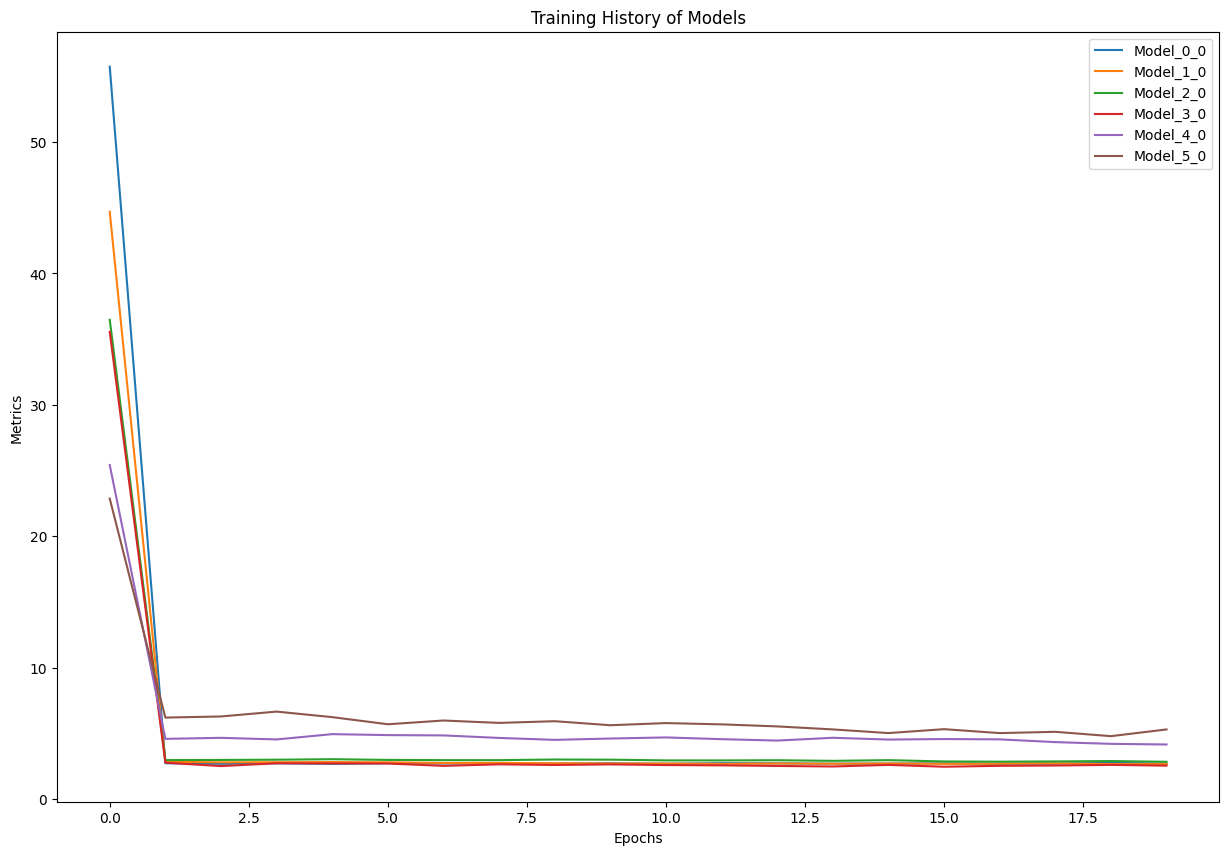

In [71]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(lean_amine_dens_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(lean_amine_dens_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(lean_amine_dens_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(lean_amine_dens_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(lean_amine_dens_4_history.history['loss']).add_prefix('Model_4_')
history_5_df = pd.DataFrame(lean_amine_dens_5_history.history['loss']).add_prefix('Model_5_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df, history_5_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

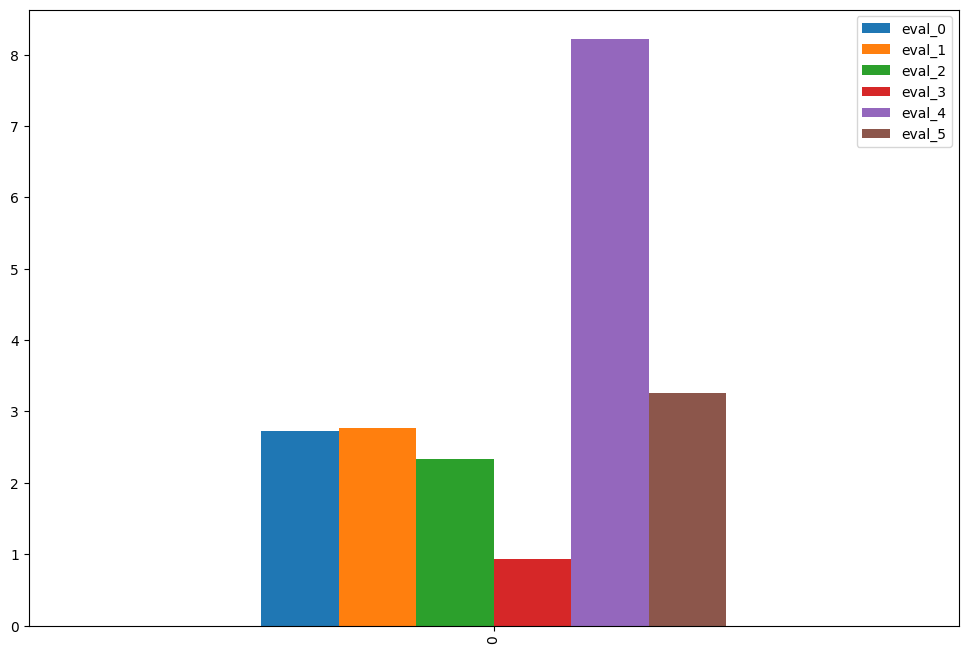

In [72]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
    'eval_5': eval_5[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения плотности регенерированного амина

In [73]:
## Тестовая и обучающая выборки
X = lean_amine_dens_data[[
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac',
    'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
    'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'lean_amine molecular weight', 
]]

y = lean_amine_dens_data[[
    'lean_amine Mass density, kg/m3'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine CO2 mol frac', 'lean_amine Methane mol frac',
    'lean_amine Ethane mol frac', 'lean_amine Propane mol frac', 'lean_amine i-Butane mol frac',
    'lean_amine n-Butane mol frac',
    'lean_amine i-Pentane mol frac', 'lean_amine n-Pentane mol frac', 'lean_amine H2S mol frac', 'lean_amine H2O mol frac',
    'lean_amine MDEAmine mol frac',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h',
    'lean_amine i-Butane molar flow, kgmol/h', 'lean_amine n-Butane molar flow, kgmol/h',
    'lean_amine i-Pentane molar flow, kgmol/h', 'lean_amine n-Pentane molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'lean_amine molecular weight', 
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

joblib.dump(ct, './column_transformers/amine_treatment_24_08/lean_amine_dens_transformer.pkl')

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((233585, 26), (233585, 1))

In [74]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
lean_amine_dens_model = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
lean_amine_dens_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
lean_amine_dens_history = lean_amine_dens_model.fit(X_train_normal, y_train, epochs=40)

Epoch 1/40
7300/7300 [==============================] - 9s 1ms/step - loss: 17.1048 - mae: 17.1048
Epoch 2/40
7300/7300 [==============================] - 9s 1ms/step - loss: 3.1589 - mae: 3.1589
Epoch 3/40
7300/7300 [==============================] - 9s 1ms/step - loss: 3.1147 - mae: 3.1147
Epoch 4/40
7300/7300 [==============================] - 9s 1ms/step - loss: 2.8349 - mae: 2.8349
Epoch 5/40
7300/7300 [==============================] - 8s 1ms/step - loss: 2.9478 - mae: 2.9478
Epoch 6/40
7300/7300 [==============================] - 9s 1ms/step - loss: 2.8099 - mae: 2.8099
Epoch 7/40
7300/7300 [==============================] - 9s 1ms/step - loss: 3.0642 - mae: 3.0642
Epoch 8/40
7300/7300 [==============================] - 9s 1ms/step - loss: 3.0205 - mae: 3.0205
Epoch 9/40
7300/7300 [==============================] - 9s 1ms/step - loss: 2.8052 - mae: 2.8052
Epoch 10/40
7300/7300 [==============================] - 9s 1ms/step - loss: 2.9896 - mae: 2.9896
Epoch 11/40
7300/7300 [====

In [75]:
lean_amine_dens_model.evaluate(X_test_normal, y_test)

1825/1825 [==============================] - 2s 892us/step - loss: 0.3166 - mae: 0.3166


[0.3166199028491974, 0.3166199028491974]

In [76]:
y_pred = lean_amine_dens_model.predict(X_test_normal)

1825/1825 [==============================] - 2s 877us/step


In [77]:
y_pred

array([[1030.0543],
       [1047.206 ],
       [1034.7926],
       ...,
       [1044.9286],
       [1009.9398],
       [1038.9738]], dtype=float32)

In [78]:
y_test

,"lean_amine Mass density, kg/m3"
331272,1028.519918
309820,1047.334511
265990,1034.682185
251873,1042.091950
206275,1032.197327
...,...
467512,1043.064321
434437,1046.795945
356621,1045.034245
416607,1009.795401


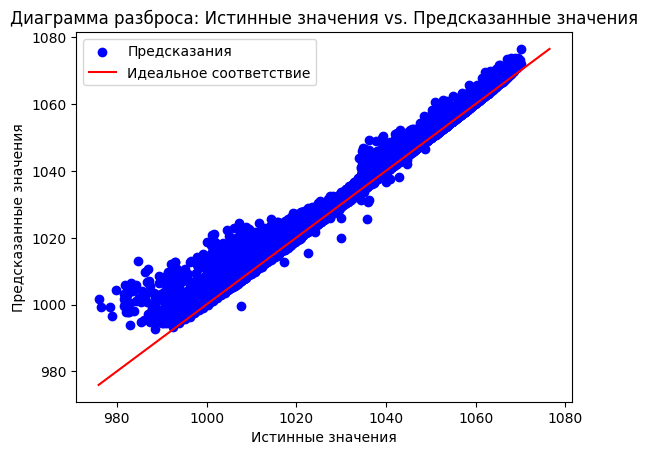

In [56]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

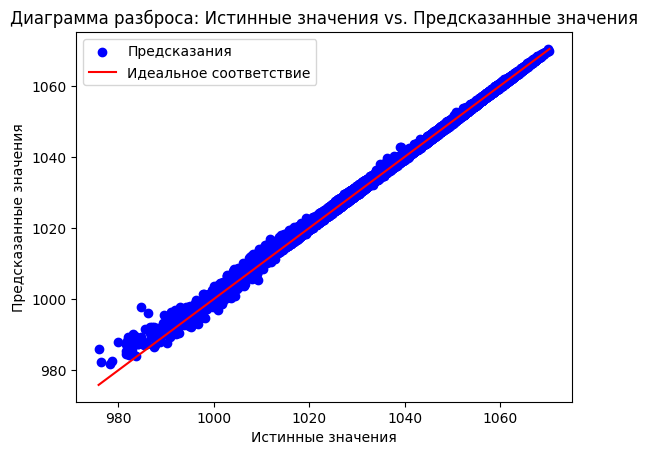

In [79]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))